In [27]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import threading

from keras import backend as K
from keras import losses
from keras.callbacks import Callback, LearningRateScheduler
from keras.layers import *
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import Iterator, ImageDataGenerator
from keras.utils.data_utils import Sequence
from skimage import img_as_float, io
from skimage.transform import resize

from sklearn.metrics import accuracy_score
from Generator import *
from Layers import DenseNet

In [3]:
TRAIN = './images_training/'
TEST = './images_test_rev1/'
LABELS = './solutions'

In [4]:
files = sorted(os.listdir(TRAIN))
train_files = files[6000:]
val_files = files[:6000]
test_files = sorted(os.listdir(TEST))
print(len(train_files))
print(len(val_files))
print(len(test_files))

55578
6000
79975


In [5]:
train_labels = pd.read_csv(LABELS).set_index('GalaxyID').T.to_dict('list')
print(/home/dhruv/Documents/DS/DSI/Capstone/Galaxy/galaxy_images/CNN_classification.ipynblen(train_labels))

61578


In [7]:
IMAGE_SIZE = 97
model = DenseNet(IMAGE_SIZE, k=40, bn=None, theta=0.5, drop=None, B=2, L=3, outs=37)
model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 4, 97, 97, 3)  0                                            
____________________________________________________________________________________________________
conv3d_1 (Conv3D)                (None, 4, 49, 49, 80) 11840       input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, 4, 49, 49, 80) 320         conv3d_1[0][0]                   
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 4, 49, 49, 80) 0           batch_normalization_1[0][0]      
__________________

In [10]:
def rmse(y_true, y_pred):
    return K.sqrt(losses.mean_squared_error(y_true, y_pred))

def mean_squared_error(y_true, y_pred):
    return K.mean(K.square(y_pred - y_true), axis=-1)

In [11]:
Batch_Size = 32
TRAIN_Batch_Size = 22
PSEUDO_Batch_Size = Batch_Size - TRAIN_Batch_Size

train_generator = StandardIterator(TRAIN, train_files, train_labels, batch_size=Batch_Size)
pseudo_generator = MixedIterator(TRAIN, train_files, val_files, TEST, test_files, train_labels,
                                     batch_split=(TRAIN_Batch_Size, PSEUDO_Batch_Size))
val_generator = StandardIterator(TRAIN, val_files, train_labels, batch_size=Batch_Size, shuffle=False)

In [ ]:
# model.compile(optimizer=Adam(0.001), loss=mean_squared_error, metrics=['accuracy'])
# training_progress = model.fit_generator(train_generator,
#                     steps_per_epoch=len(train_files)//Batch_Size,
#                     epochs=30,
#                     validation_data=val_generator,
#                     validation_steps=len(val_files)//Batch_Size,
#                     max_queue_size=10)

Epoch 1/30
1736/1736 [==============================] - 9700s - loss: 0.0168 - acc: 0.6503 - val_loss: 0.0146 - val_acc: 0.6753
Epoch 2/30
1736/1736 [==============================] - 9693s - loss: 0.0124 - acc: 0.7262 - val_loss: 0.0362 - val_acc: 0.6017
Epoch 3/30
1736/1736 [==============================] - 9691s - loss: 0.0113 - acc: 0.7459 - val_loss: 0.0135 - val_acc: 0.6635
Epoch 4/30
1736/1736 [==============================] - 9689s - loss: 0.0107 - acc: 0.7572 - val_loss: 0.0128 - val_acc: 0.7326
Epoch 5/30
1736/1736 [==============================] - 9691s - loss: 0.0102 - acc: 0.7629 - val_loss: 0.0215 - val_acc: 0.4055
Epoch 6/30
1736/1736 [==============================] - 9694s - loss: 0.0099 - acc: 0.7689 - val_loss: 0.0166 - val_acc: 0.5937
Epoch 7/30
1736/1736 [==============================] - 9691s - loss: 0.0096 - acc: 0.7699 - val_loss: 0.0159 - val_acc: 0.7185
Epoch 8/30
1736/1736 [==============================] - 9691s - loss: 0.0094 - acc: 0.7745 - val_loss: 0

In [13]:
model.compile(optimizer=Adam(0.001), loss=mean_squared_error, metrics=['accuracy'])
training_progress = model.fit_generator(train_generator,
                    steps_per_epoch=len(train_files)//Batch_Size,
                    epochs=15,
                    validation_data=val_generator,
                    validation_steps=len(val_files)//Batch_Size,
                    max_queue_size=10,
                    use_multiprocessing=True)

Epoch 1/15
1736/1736 [==============================] - 9751s - loss: 0.0155 - acc: 0.6659 - val_loss: 0.0195 - val_acc: 0.5488
Epoch 2/15
1736/1736 [==============================] - 9737s - loss: 0.0122 - acc: 0.7316 - val_loss: 0.0407 - val_acc: 0.3095
Epoch 3/15
1736/1736 [==============================] - 9739s - loss: 0.0111 - acc: 0.7472 - val_loss: 0.0127 - val_acc: 0.7360
Epoch 4/15
1736/1736 [==============================] - 9743s - loss: 0.0106 - acc: 0.7576 - val_loss: 0.0244 - val_acc: 0.5916
Epoch 5/15
1736/1736 [==============================] - 9736s - loss: 0.0100 - acc: 0.7695 - val_loss: 0.0116 - val_acc: 0.7169
Epoch 6/15
1736/1736 [==============================] - 9729s - loss: 0.0097 - acc: 0.7720 - val_loss: 0.0135 - val_acc: 0.7373
Epoch 7/15
1736/1736 [==============================] - 9737s - loss: 0.0094 - acc: 0.7775 - val_loss: 0.0098 - val_acc: 0.7818
Epoch 8/15
1736/1736 [==============================] - 9735s - loss: 0.0091 - acc: 0.7834 - val_loss: 0

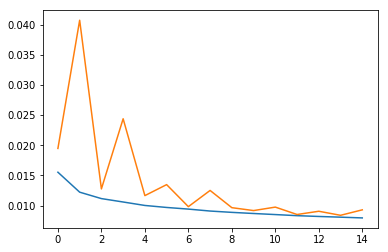

In [14]:
plt.plot(training_progress.epoch, training_progress.history['loss'], label='Train')
plt.plot(training_progress.epoch, training_progress.history['val_loss'], label='Validation')

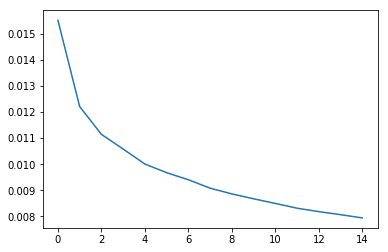

In [28]:
plt.plot(training_progress.epoch, training_progress.history['loss'], label='Train')

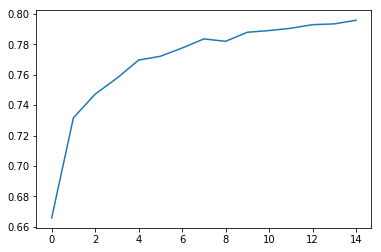

In [33]:
plt.plot(training_progress.epoch, training_progress.history['acc'], label='Validation')

Predict

In [22]:
test_size = len(test_files)
preds = model.predict_generator(StandardIterator(TEST, test_files, batch_size=35, shuffle=False), steps=test_size//35, verbose=1)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


2285/2285 [==============================] - 4336s  
